In [1]:
import numpy as np
import cv2

def fill_point_cloud_section(image):
    # 1. 找到所有白色像素点的坐标
    white_pixels = np.where(image > 0)
    points = list(zip(white_pixels[1], white_pixels[0]))  # (x,y)坐标
    if not points:
        return image
    points.sort()  # 按x坐标排序
    
    # 2. 创建新图像
    height, width = image.shape
    filled_image = np.zeros_like(image)
    
    # 3. 使用插值连接点
    x_coords = np.array([p[0] for p in points])
    y_coords = np.array([p[1] for p in points])
    
    # 对所有x坐标进行遍历
    for x in range(width):
        try:
            # 找到对应的y值
            if x < min(x_coords) or x > max(x_coords):
                continue
                
            # 找到x左右两边最近的点
            mask = (x_coords <= x)
            if not any(mask) or all(mask):
                continue
                
            left_idx = np.where(mask)[0][-1]
            right_idx = np.where(~mask)[0][0]
            
            # 线性插值计算y值
            if left_idx == right_idx:
                y = y_coords[left_idx]
            else:
                x1, y1 = x_coords[left_idx], y_coords[left_idx]
                x2, y2 = x_coords[right_idx], y_coords[right_idx]
                # 检查除数是否为0
                if x2 - x1 == 0:
                    y = y1
                else:
                    y = y1 + (y2 - y1) * (x - x1) / (x2 - x1)
            
            # 确保y值有效
            if np.isnan(y):
                continue
                
            y = int(np.clip(round(y), 0, height-1))
            # filled_image[0:y, x] = 255  # 上方填充白色
            filled_image[y, x] = 255  # 上方填充白色
            
        except Exception as e:
            print(f"Error at x={x}: {str(e)}")
            continue
    
    return filled_image



def process_point_cloud_image(image):
    """处理点云图像的主函数"""
    # 1. 预处理：确保图像是二值图像
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    
    # 2. 基本填充
    try:
        filled = fill_point_cloud_section(binary_image)
    except Exception as e:
        print(f"Fill error: {str(e)}")
        return binary_image
    
    # 3. 平滑处理
    try:
        smoothed = smooth_boundary(filled)
    except Exception as e:
        print(f"Smooth error: {str(e)}")
        return filled
    
    return smoothed


# 使用示例
def main():
    image_path = "./images/first/projected_image_8.png"  # 输入图像路径
    output_path = "./images/first/processed_image.png"  # 输出图像路径
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    result = process_point_cloud_image(image)

    cv2.imwrite(output_path, result)
    
    return result
    





# main()

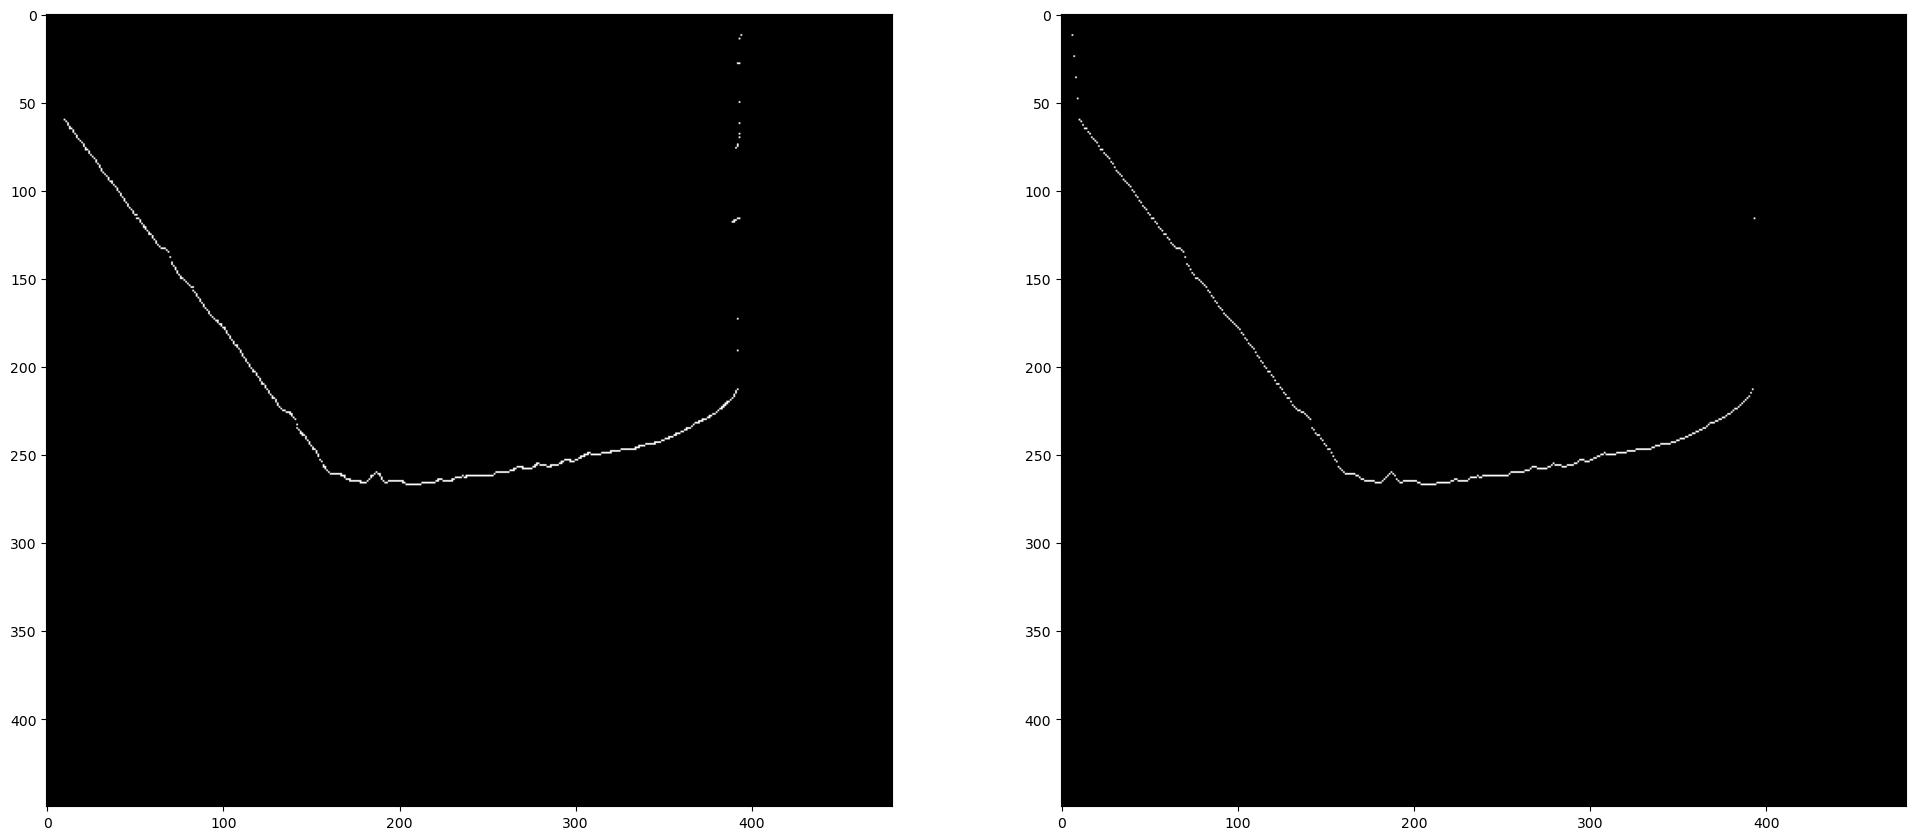

In [17]:
import matplotlib.pyplot as plt
import cv2
image_path = "./images/bead3/projected_image_8.png"  # 输入图像路径
output_path = "./images/bead3/processed_image.png"  # 输出图
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image[0, 5] = 255

plt.figure(figsize=(24, 24))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

image = fill_point_cloud_section(image)
# image = process_point_cloud_image(image)
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')

[394  12]
86


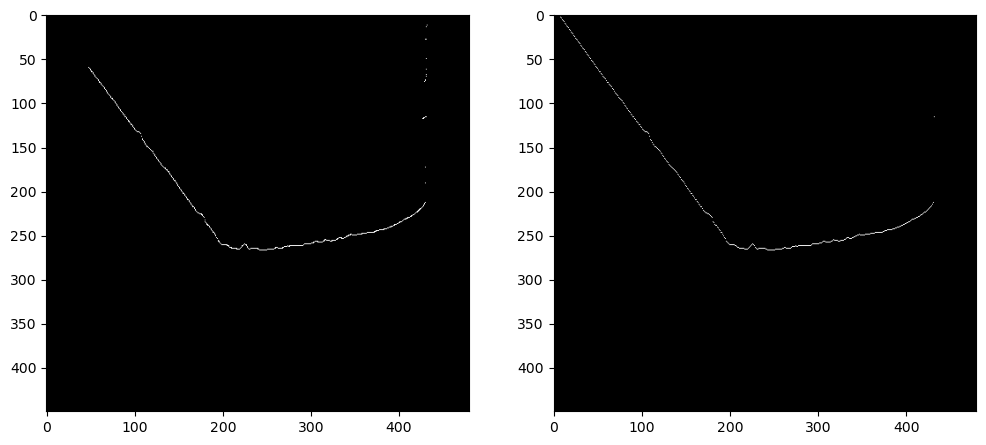

In [20]:
image = cv2.imread('./images/bead3/projected_image_8.png', cv2.IMREAD_GRAYSCALE)
points = np.where(image == 255)
points = np.column_stack((points[1], points[0]))
points = points[points[:, 0].argsort()]
print(points[-1])
dx = 480 - points[-1][0]
print(dx)
image = image[:, 0 : 480 - 38]
pading = np.zeros((image.shape[0], 38))
image = np.hstack((pading, image))
cv2.imwrite('./images/bead3/fixed_projected_image_8.png', image)
# plt.figure(figsize=(24, 24))
# plt.imshow(image, cmap='gray')

image[0, 5] = 255

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

image = fill_point_cloud_section(image)
# image = process_point_cloud_image(image)
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
